### **Advertisement Click Classification Case Study**

**Objective:** To learn from historical data of advertisement clicks using ML and creating a model to predict who is going to click on the Advertisement on a website in future based on user behaviour and profile.

## Flow of case study:

- Data Loading
- Data Preprocessing
-----


In [33]:
# Supressing the warnign messages
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np

AdClickData=pd.read_csv("../Datasets/AdClickData.csv")
AdClickData

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0


In [2]:
list(AdClickData.columns)

['VistID',
 'Time_Spent',
 'Age',
 'Avg_Income',
 'Internet_Usage',
 'Ad_Topic',
 'Country_Name',
 'City_code',
 'Male',
 'Time_Period',
 'Weekday',
 'Month',
 'Year',
 'Clicked']

#### Data Preprocessing

In [3]:
# Checking size of dataframe
print('Shape after deleting duplicate values: ', AdClickData.shape)

# Removing duplicate rows if any
AdClickData=AdClickData.drop_duplicates()
print('Shape after deleting duplicate values: ', AdClickData.shape)

AdClickData

Shape after deleting duplicate values:  (6657, 14)
Shape after deleting duplicate values:  (6657, 14)


,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,1215532,69.08,23,57756.89,195.68,product_29,Jersey,City_4,Yes,Night,Thursday,April,2020,0
6653,1199837,72.23,23,52968.22,247.90,product_25,Madagascar,City_5,Yes,Noon,Sunday,July,2020,0
6654,8523595,57.20,56,24079.00,129.23,product_24,Algeria,City_2,No,Morning,Thursday,April,2020,1
6655,2584490,88.04,28,64188.50,241.03,product_18,Bosnia and Herzegovina,City_7,Yes,Mid-Night,Friday,January,2020,0


In [4]:
AdClickData.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

#### Defining the problem statement:

**Making a predictive model which can tell whether a logger in user will click on  a given advertisement of not?**

- **Target Variable:** `Clicked`
                    - = 0 (means ad was NOT clicked)
                    - = 1 (means ad was clicked)

- **Predictors:** 'VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year'

#### Determining the type of ML

As target variable is categorical, can create a supervised ML classification model

#### Determining the distribution of Targer variable

- If target variable is too skewed then predictive model is not possible
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- While performing Classification, ensure that there is a balance in the distribution of each class otherwise it impacts the Machine Learning ability to learn all the classes

<Axes: xlabel='Clicked'>

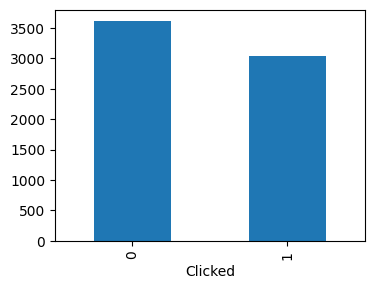

In [5]:
%matplotlib inline

# Creating Bar Chart as the Target variable is Categorical
GroupedData=AdClickData.groupby('Clicked').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [6]:
AdClickData['Clicked']

0       0
1       1
2       0
3       1
4       0
       ..
6652    0
6653    0
6654    1
6655    0
6656    1
Name: Clicked, Length: 6657, dtype: int64

In [7]:
clicked_counts=AdClickData['Clicked'].value_counts()
difference=clicked_counts[0]-clicked_counts[1]
percentage_diff=abs(difference/clicked_counts.sum())*100

print("Difference between Clicked = 0 and Clicked = 1: {0}\n"
"Difference in percentage w.r.t total size of data: {1: .2f}%".format(difference, percentage_diff))

Difference between Clicked = 0 and Clicked = 1: 581
Difference in percentage w.r.t total size of data:  8.73%


As the difference in different values of categorical data in **Clicked** is <10%, then the Target variable distribution looks balanced.

#### Basic Data Exploration

Step for basically to gauge the overall data, volume of the data, the types of columns present in the data, etc.


Initial assessment of data should be done to identify which columns are Qunantitative, Categorical or Qualitative.


- This step helps to start the columns rejection process,
    - Identifying if a column affects the values of the Target variable
    - Basically asking if click or no-click of the advertisement is affected by that column
        - if the answer is "No" -> remove that column
        - else keep it

In [8]:
AdClickData.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

- Initially we cam gauge that "VistID", "Country_Name" and "Year" would not be helpful in click or no-click for an advertisement.clicked_counts
- Hence removing them from the data.

Basic commands in the Data Exploration:
- head(): Helps to see top 5 rows of the data
- info(): Provides summarized info of the data
- describe(): Provides the descriptive statistical details of the data
- nunique(): Helps to identify if a column is categorical or continuous

In [9]:
AdClickData.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [10]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
AdClickData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [11]:
# Descriptive statistices of the data
AdClickData.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [12]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is 
# likely to be a category otherwise continuous
AdClickData.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

In [13]:
# list(AdClickData.columns)

#### Basic Data Exploration Results

- **VistID**: Qualitative, **Rejected**. Does not affect the ad click
- **Time_Spent**: Continuous, selected
- **Age**: Continuous, selected
- **Avg_Income**: Continuous, selected
- **Internet_Usage**: Continuous, selected
- **Ad_Topic**: Categorical, selected
- **Country_Name**: Qualitative, **Rejected**, has very high cardinality
- **City_code**: Categorical, selected
- **Male**: Categorical, selected
- **Time_Period**: Categorical, selected
- **Weekday**: Categorical, selected
- **Month**: Categorical, selected
- **Year**: Qualitative, **Rejected**, has very high cardinality
- **Clicked**: Categorical, selected, **Target variable**

#### Removing useless variables from data

- Removing 'VistID', 'Country_Name', 'Year' columns from  the data

In [14]:
list(AdClickData.columns)

['VistID',
 'Time_Spent',
 'Age',
 'Avg_Income',
 'Internet_Usage',
 'Ad_Topic',
 'Country_Name',
 'City_code',
 'Male',
 'Time_Period',
 'Weekday',
 'Month',
 'Year',
 'Clicked']

In [15]:
# Deleting non-useful columns from prediction analysis as the columns are qualitative
columnsToRemove=["VistID", "Country_Name", "Year"]
AdClickData=AdClickData.drop(columnsToRemove, axis=1)
AdClickData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


#### Visualization and Data Analysis

- Categorical variables: Bar plot
- Continuous variables: Histogram

##### Visualization of all the Categorical Predictor variables in the data 

`Using bar plots`

- We can spot a categorical variable in the data by looking at the unique values in them. 
- Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

**Categorical Predictors:** "Ad_Topic", "City_code", "Male", "Time_Period", "Weekday", "Month"

In [16]:
print(AdClickData.columns)
print(f"{len(AdClickData.columns)}")


Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Ad_Topic',
       'City_code', 'Male', 'Time_Period', 'Weekday', 'Month', 'Clicked'],
      dtype='object')
11


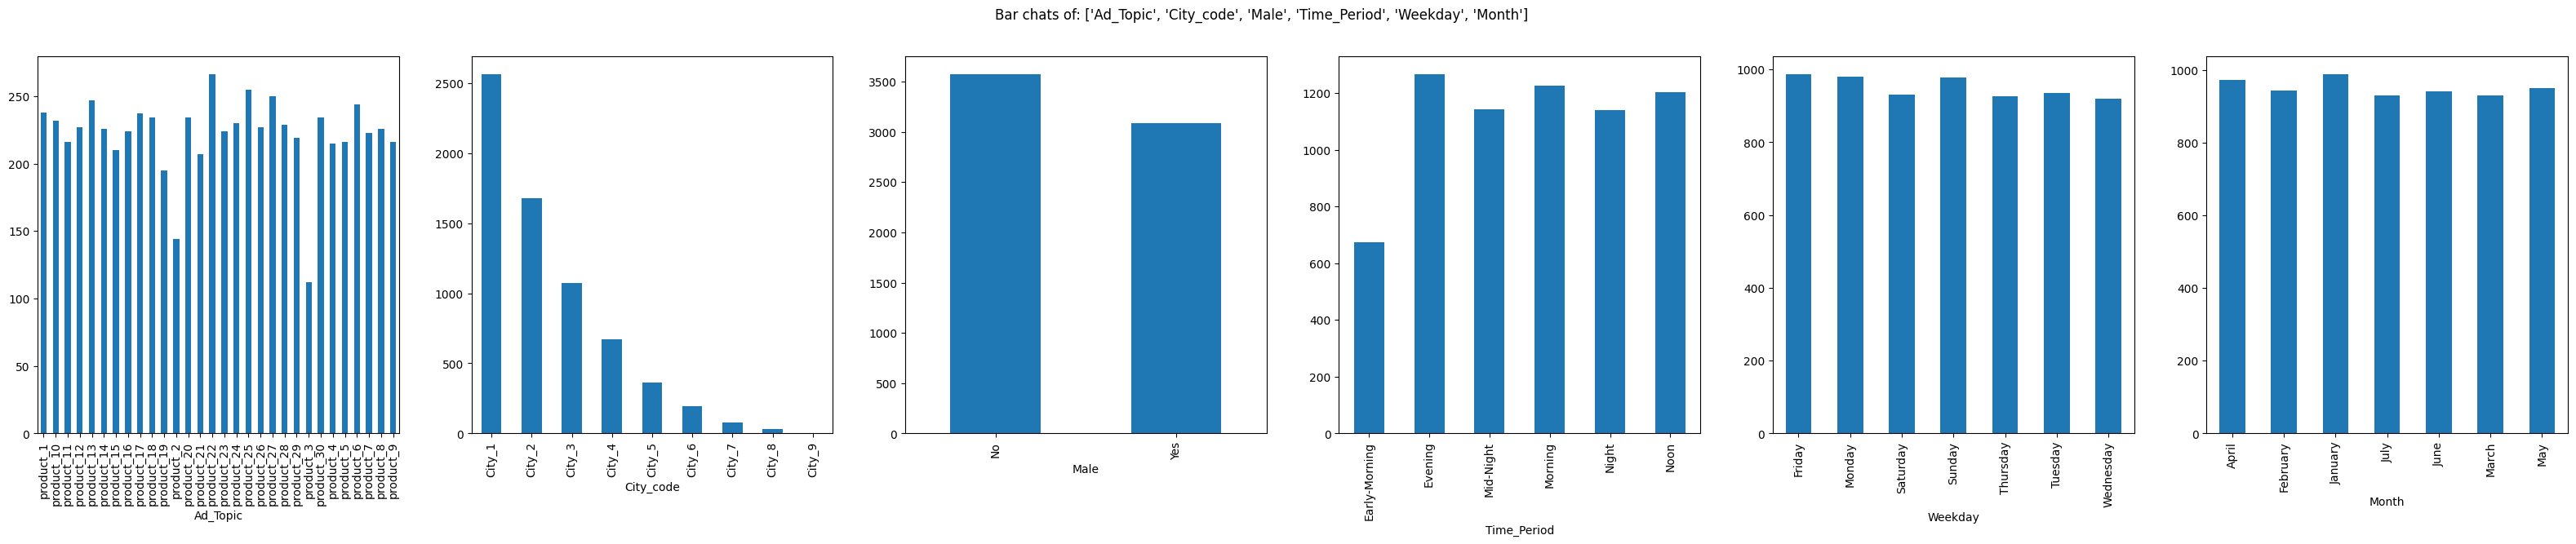

In [17]:
# PLotting multiple bar chats at once for categorical variables
def PlotBarChats(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40, 6))
    fig.suptitle('Bar chats of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

PlotBarChats(inpData=AdClickData, colsToPlot=["Ad_Topic", "City_code", "Male", "Time_Period", "Weekday", "Month"])

#### **Bar Charts Interpretation**
- These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
- The ideal bar chart looks like chart of "Weekday" and "Month" column.
- If there is a column showing skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
    - These can be helpful in correlation analysis section and take a final call to select or reject in one column.
    - All categorical columns have satisfactory distribution.

**Selected Categorical Variables:** ["Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"]

##### **Visualize distribution of all the Continuous Predictor variables in the data using histograms**


- On the basis of Basic Data Exploration, four continuous predictor variables are found:
    - "Time_Spent"
    - "Age"
    - "Avg_Income"
    - "Internet_Usage"

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

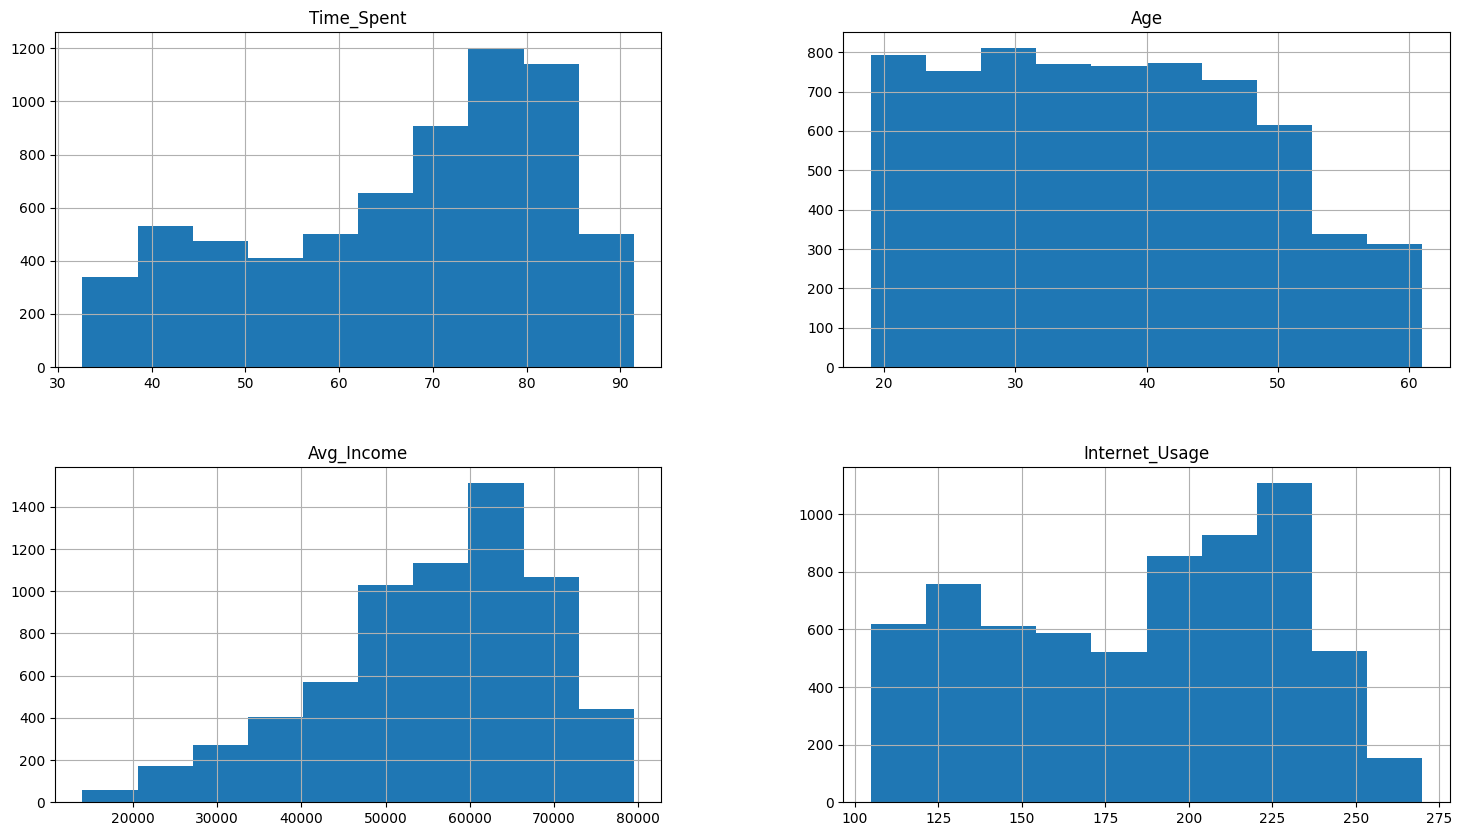

In [18]:
# Plotting histograms of multiple columns together
AdClickData.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(18,10))

#### **Histogram Interpretation**

- Histogram shows us the data interpretation for a single continuous variable.
- X-axis: Shows the range of values
- Y-axis: Represents the number of values in the range

- Ideal outcome for histogram is a bell curve or slightly skews bell curve
    - If too much skewness, outlier treatment should be 

**Selected Categorical Variables:**
- "Time_Spent" : Selected
- "Age" : Selected
- "Avg_Income" : Selected, sligthly negative distribution, acceptable
- "Internet_Usage" : Selected

#### **Outlier Treatment**

- Outlier are extreme values in the data which are far away from most of the values, can be seen from the tails in the histogram.

- Outliers must be treated one column at a time, as each column will be slightly different from each column.

**How and why to treat Outliers**

- Outliers bias the training of ML models.

- As the alogorithm tries to fit the extreme values, it goes away from the majority in the data.

- Two options to treat outlier in the data:
    - Option 1: Delete the outlier records. Only of there are just few rows lost.
    - Option 2: Impute the outliers values with a logical business value.

In the data none of the continuous predictors had outliers, hence treatment is not required.

#### **Missing values treatmnt**

- Missing values are treated for each columns separately.

- If a column has > 30 % data missing, then missing value treatmet cannot be done.
    - The column must be rejected as too much information in missing.

- Available options for treating missin values in data.
    1. `Delete the missing value rows` if there are only few records
    2. `Impute the missing values with MEDIAN value` for continuous variables
    3. `Impute the missing values with MODE values` for categorical variables
    4. `Interpolate the values` 
        - based on nearby values
        - based on business logic

In [19]:
# Finding how many missing values are there for each column
AdClickData.isnull().sum() 

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

As none of the columns in the data have any missing values, hence missing value treatment is not required.

## **`Feature Selection`**

- Time to choose the best columns (Features) which are correlated to the Target variables.

- Can be done directly by measuring the correlation values or ANOVA/Chi-square tests.

- Before it, visualizing the relation between the Target variable and each of the predictors to get a better sense of data.

### Visual exploration of relationship between variables
- Continuous Vs Continuous: Scatter Plot
- Categorical Vs Categorical: Box Plot
- Categorical Vs Categorical: Groupd Bar Plots

### Stastical measurement of relationship strength between variables
- Continuous Vs Continuous: Correlation matrix
- Categorical Vs Continuous: ANOVA Test
- Categorical Vs Categorical: Chi-Square Test

Target Variable is categorical, hence two scenarios are present:

- Categorical Target Variable Vs Continuous Predictor
- Categorical Target Variable Vs Categorical Predictor

#### Relationship exploration: Categorical Vs Continuous: Box Plots

- When:
    - target variable -> Categorical and predictor variable -> Continuous

We analyze the relation using bar plots/Boxplots and measure the strength of relationship using Anova test

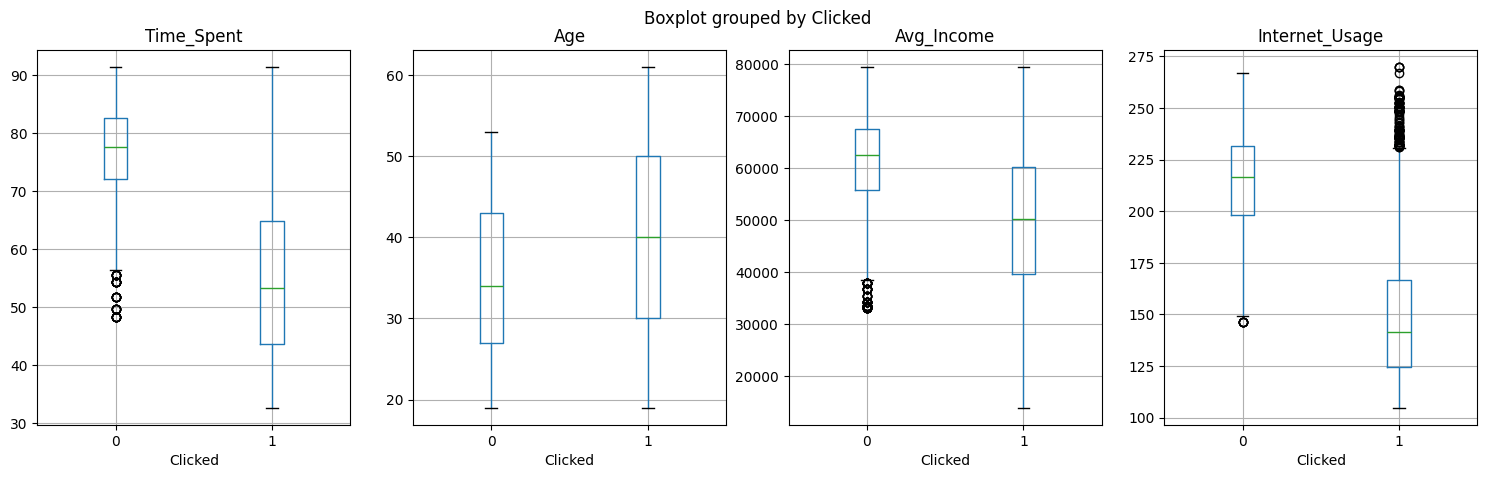

In [20]:
# Box plots for Categorical Target variable "Clicked" and Continuous predictors
ContinuousColList=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]

import matplotlib.pyplot as plt

fig, plotCanvas = plt.subplots(nrows=1, ncols=len(ContinuousColList), figsize=(18,5))

# Creating box plots for each continuous predictors against the Target variable "Clicked"
for PredictorCol, i in zip(ContinuousColList, range(len(ContinuousColList))):
    AdClickData.boxplot(column=PredictorCol, by='Clicked', figsize=(5,5), vert=True, ax=plotCanvas[i])

#### **Box-Plots Interpretations**

- Points to notice in a box plots:
    - These plots give an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis
    - If distribution looks similar for each category (Boxes are in the same line), meaning that the continuous variable has NO effect on the target variable.
        - Variables are not correlated to each other

In the chart "Time_Spent" Vs "Clicked", the boxes are NOT in the same line, thus people who clicked on the ads have lesser Time_Spent compared to the people who did not click, thus the column is correlated with the Clicked column.

Similarly other 3 charts also exhibit the same characterstics, hence all 4 continuous predictors are correlated with the target variable.

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance (ANOVA) is performed to check if there is any relationship between the continuous and categorical variable

- Assumption null hypothesis (H0): There is no relation between the given variable (i.e. Average(mean) values of the numeric Predictor variable is same for all groups in the Target Variable)

- ANOVA Test result: Probability of H0 being true

In [21]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorist):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    selectedPredictors=[]

    print('##### ANOVA Results ##### \n')

    for predictor in ContinuousPredictorist:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA p-value is less than 0.05, it means the predictor is statistically significant
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P=Value:', AnovaResults[1])
            selectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, ' | P=Value:', AnovaResults[1])
    return (selectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with the target
ContinuousVariables = ["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
FunctionAnova(inpData=AdClickData, TargetVariable='Clicked', ContinuousPredictorist=ContinuousVariables)

##### ANOVA Results ##### 

Time_Spent is correlated with Clicked | P=Value: 0.0
Age is correlated with Clicked | P=Value: 6.40789044460054e-91
Avg_Income is correlated with Clicked | P=Value: 0.0
Internet_Usage is correlated with Clicked | P=Value: 0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

The results of ANOVA confirms our visual analysis using the box-plots.
- All four are correlated with the Clicked (Target Variables)

#### Relationship exploration: Categorical Vs Categorical: Grouped Bar Charts

- When:
    - target variable -> Categorical and similarly the predictor variable -> Categorical

We analyze the correlation between them visually using bar plots/Boxplots and statistically using Chi-Square test

In [23]:
# Cross tabulation between two categorical variables
CrossTabResults=pd.crosstab(index=AdClickData['Male'], columns=AdClickData['Clicked'])
CrossTabResults

Clicked,0,1
Male,,
No,1896,1675
Yes,1723,1363


In [24]:
AdClickData.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Ad_Topic',
       'City_code', 'Male', 'Time_Period', 'Weekday', 'Month', 'Clicked'],
      dtype='object')

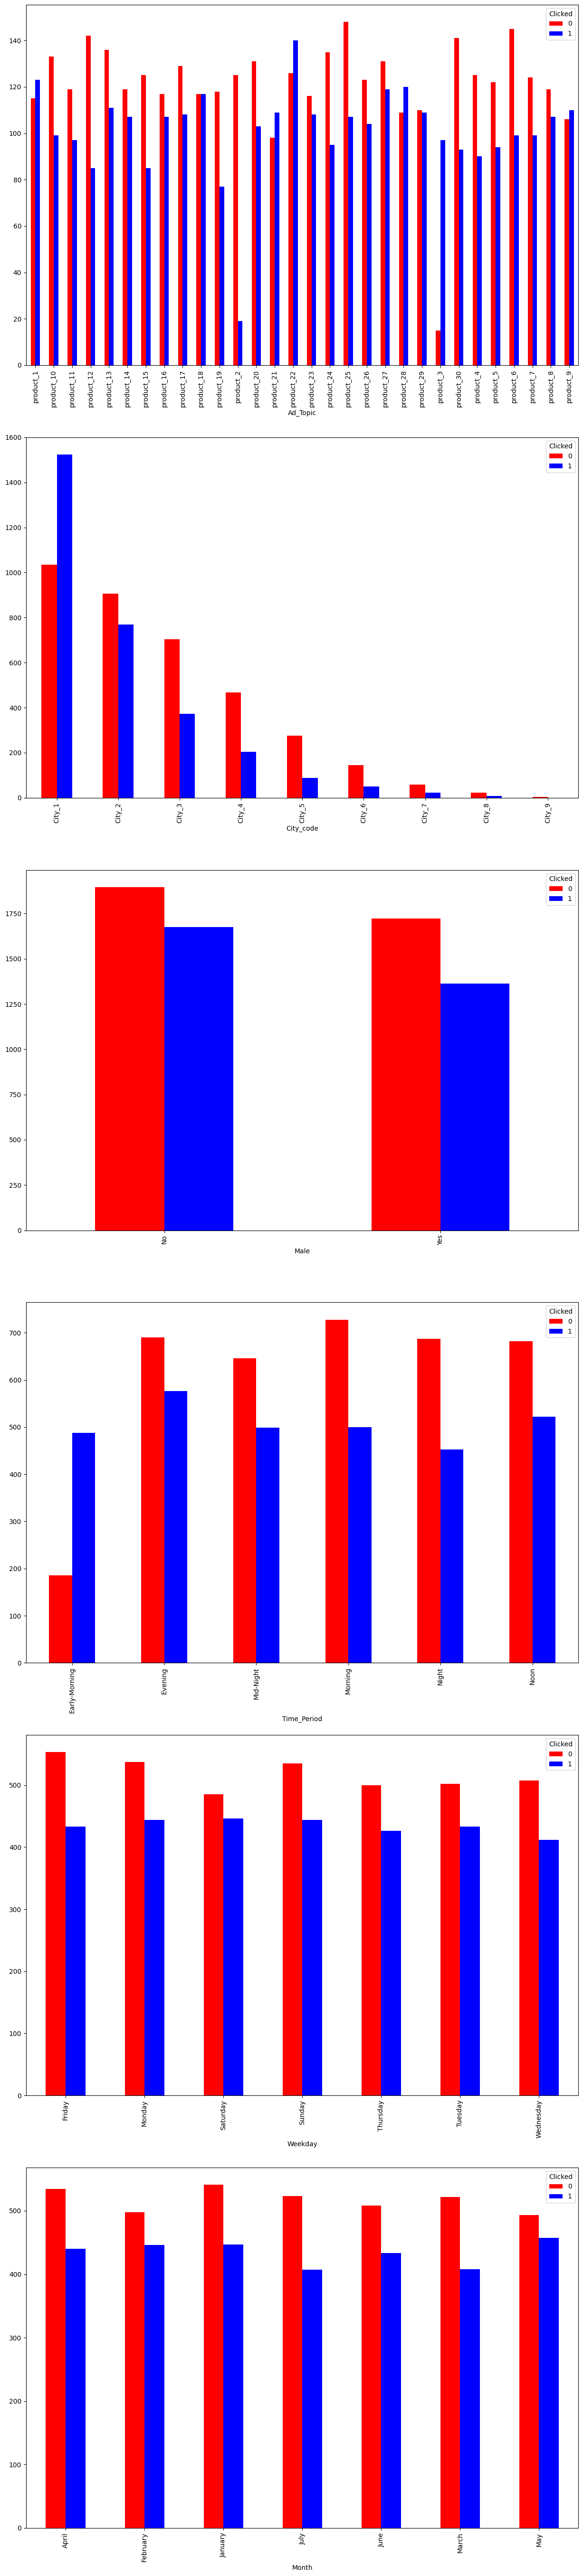

In [25]:
# Visual inference using Grouped Bar Charts
CategoricalColList=["Ad_Topic", "City_code", "Male", "Time_Period", "Weekday", "Month"]

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=len(CategoricalColList), ncols=1, figsize=(15,69))

# Creating grouped bar plots for each categorical predictor against Target Variable "Clicked"
for CategoricalCol, i in zip(CategoricalColList, range(len(CategoricalColList))):
    CrossTabResults=pd.crosstab(index=AdClickData[CategoricalCol], columns=AdClickData['Clicked'])
    CrossTabResults.plot.bar(color=['red', 'blue'], ax=PlotCanvas[i])

#### **Grouped Bar Charts Interpretations**

- Points to notice in a box plots:
    - These grouped bar charts show the frequenct in the Y-Acis and the category in the X-Axis.
    - If the ratio of the bars is similar across all categories, then the two columns are not correlated.
    - Month Vs Clicked plot
        - The Clicked vs Not-Clicked ratio is similar across all months
            - indicating that the two columns are not correlated and the number of clicks is not dependent on the month.
    - Time_Period Vs Clicked plot
        - The number of clicks are very high in the Early Morning
            - indicating Time_Period affects the Ad Click, thus the two columns are correlated with each other

Using Chi-Square tests to confirm this.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variable

- Assumption null hypothesis (H0): These two columns are NOT related to each other
- Result of Chi-Square test: The probability of H0 being True

In [26]:
# Function to find the correlation of all Categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Empty list of final selected predictors
    SelectedPredictors = []

    for predictor in CategoricalVariablesList:
        CrossTabResults=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult=chi2_contingency(CrossTabResults)

        # If the ChiSq P-Value < 0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, ' | P-Value', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, ' | P-Value', ChiSqResult[1])
    
    return (SelectedPredictors)

In [27]:
CategoricalVariables=["Ad_Topic", "City_code", "Male", "Time_Period", "Weekday", "Month"]

# Calling the function
FunctionChisq(inpData=AdClickData, TargetVariable='Clicked', CategoricalVariablesList=CategoricalVariables)

Ad_Topic is correlated with Clicked  | P-Value 1.2676573604736462e-24
City_code is correlated with Clicked  | P-Value 2.6667953391697526e-88
Male is correlated with Clicked  | P-Value 0.02695171301745074
Time_Period is correlated with Clicked  | P-Value 4.465745015735695e-47
Weekday is NOT correlated with Clicked  | P-Value 0.7226317326250824
Month is NOT correlated with Clicked  | P-Value 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for the ML model

**'Ad_Topic', 'City_code', 'Male', 'Time_Period'**

### **Selecting final predictors for Machine Learning**

In [28]:
SelectedColumns=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Ad_Topic', 'City_code', 'Male', 'Time_Period']

# Selecting final columns
DataForML=AdClickData[SelectedColumns]
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [29]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### **Data Pre-processing for Machine Learning**

Lists of steps performed on predictor variables before training a machine learning model:

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Catgorical columns to numeric using 1/0 mapping
3. Converting all other nomial categorical columns to numeric using pd.get_dummies()
4. Data Transformation: Standardization/Normalization/log/sqrt.

In this data there is no Ordinal categorical variable.



In [30]:
# Treating the binary nominal variables first
DataForML['Male'].replace({'Yes':1, 'No':0}, inplace=True)

# Data after nominal treatment
DataForML.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16036\489315237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Male'].replace({'Yes':1, 'No':0}, inplace=True)


,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


#### Converting the nominal variable to numeric using get_dummies()

In [31]:
# Treating all the nominal variables at onve using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Clicked']=AdClickData['Clicked']

# Printing sample rows
DataForML_Numeric.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,0
1,51.63,50,39132.00,176.73,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
2,82.37,38,57032.36,210.60,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,62.06,45,48868.00,190.05,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,77.66,31,61608.23,204.86,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0


### Machine Learning: Splitting the data into Training and Testing sample

- Training data: 70 %
- Testing data: 30 %

In [32]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [34]:
# Separate target variable and predictor variables
TargetVariable='Clicked'
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

### Standardization/ Normalization of data
- Step useful for KNN or Neural Networks

In [35]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using MinMax Scaler
PredictorScaler=MinMaxScaler()

# Storing fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [36]:
# Sanity check for the sampled data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4659, 50)
(1998, 50)
(4659,)
(1998,)


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
# Parameter penalty='l1' or C=1
# Solver = 'newton-cg'
clf=LogisticRegression(C=1, penalty='l2', solver='newton-cg')

# Creating the model on training data
LOG=clf.fit(X_train, y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation
# Passing full data X and y as K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1080
           1       0.96      0.90      0.93       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.93      0.93      1998

[[1043   37]
 [  94  824]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation: 
 [0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]

Final Average Accuracy of the model: 0.93


### Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1080
           1       0.89      0.90      0.90       918

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

[[976 104]
 [ 88 830]]
Accuracy of the model on Testing Sample Data: 0.9

Accuracy valued for 10-fold Cross Validation:
 [0.92022157 0.88081772 0.87852085 0.92454929 0.91859248 0.90248142
 0.89802557 0.93671902 0.92588299 0.90685001]
Final Average Accuracy of the model: 0.91


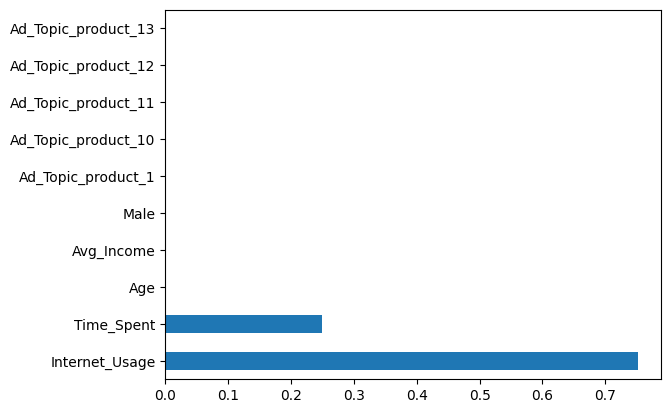

In [38]:
from sklearn import tree
# Choose from different tunable hyper parameters
clf=tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')

# Printing all parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train, y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation
# Passing full data X and y because F-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')

print('\nAccuracy valued for 10-fold Cross Validation:\n', Accuracy_Values)
print('\bFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [39]:
!pip install dtreeplt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


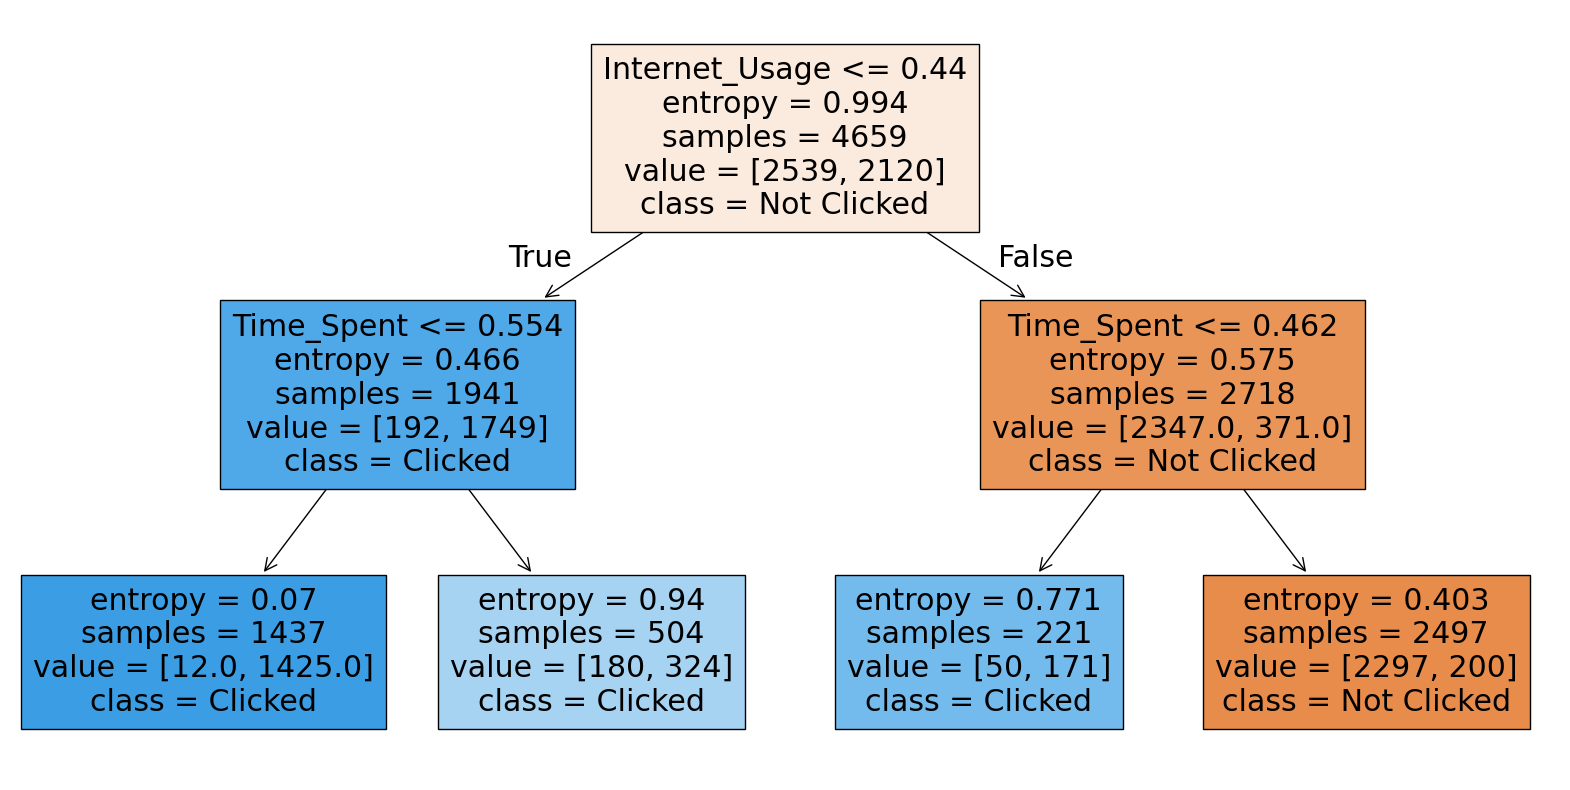

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(DTree, feature_names=Predictors, class_names=['Not Clicked', 'Clicked'], filled=True)
plt.show()

### Random Forest

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1080
           1       0.98      0.87      0.92       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1061   19]
 [ 119  799]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.91377386 0.87429435 0.91698305 0.91847128 0.92105876 0.94093118
 0.91182405 0.9242637  0.93480792 0.9304117 ]

Final Average Accuracy of the model: 0.92


<Axes: >

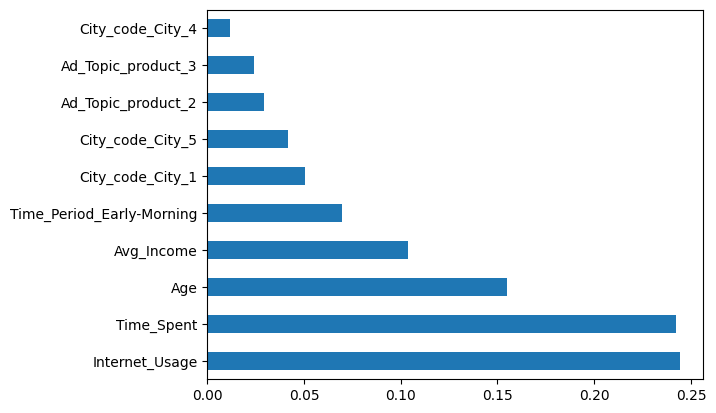

In [41]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=2, n_estimators=100, criterion='gini')
print(clf)

# Creating the model on training data
RF=clf.fit(X_train, y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing Overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Cross-validation
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### Plotting one of the Decision Tree in Random Forest

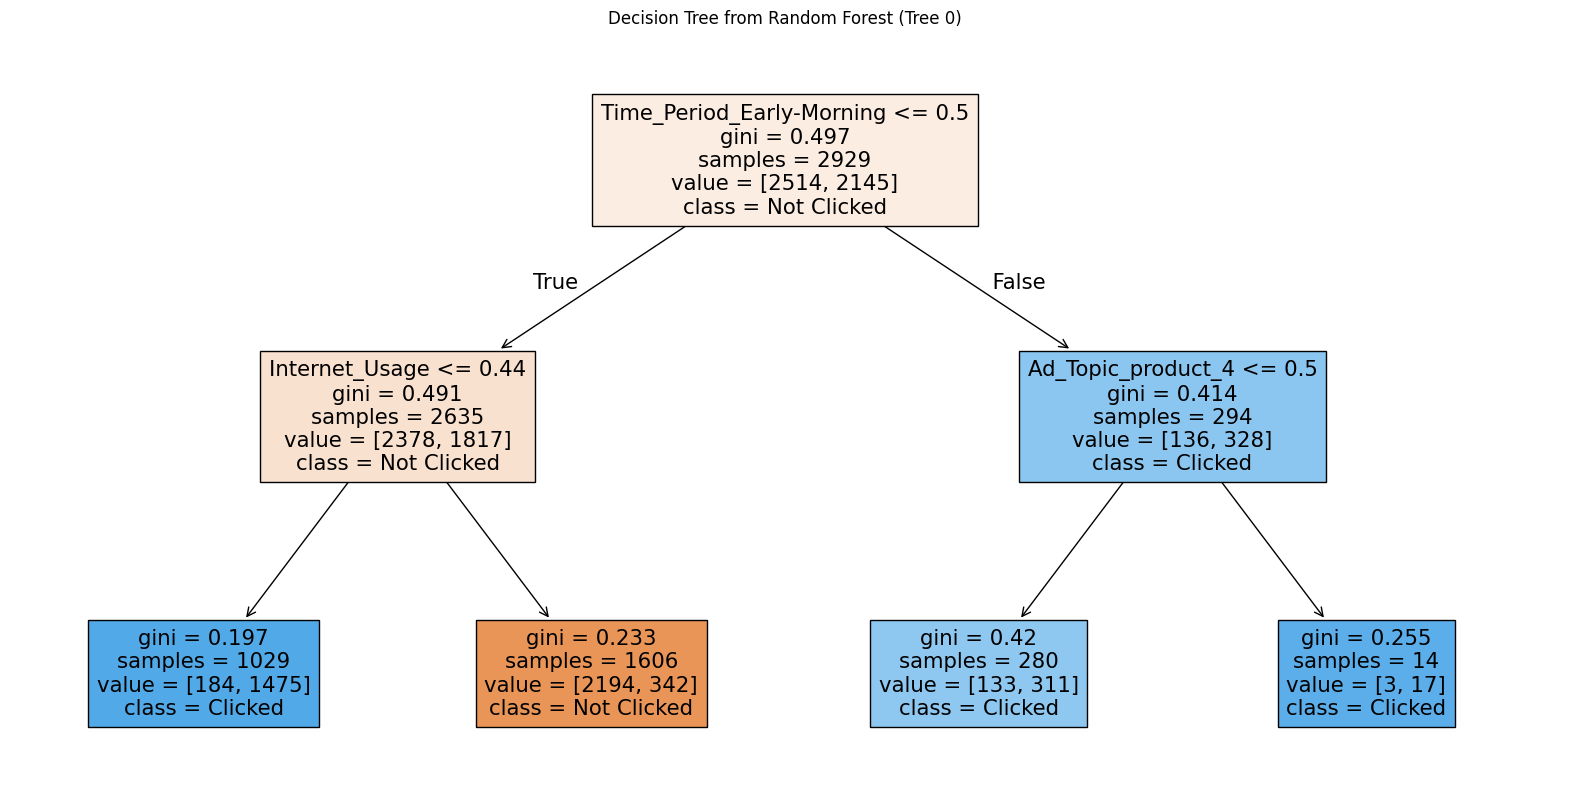

In [42]:
# Plotting a single decision Tree from the Random Forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the forest (e.g. the first one)
estimator=RF.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=Predictors, class_names=['Not Clicked', 'Clicked'], filled=True)
plt.title("Decision Tree from Random Forest (Tree 0)")
plt.show()

### AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1080
           1       0.97      0.89      0.93       918

    accuracy                           0.94      1998
   macro avg       0.94      0.93      0.94      1998
weighted avg       0.94      0.94      0.94      1998

[[1052   28]
 [  99  819]]
Accuracy of the model on Testinf Sample Data: 0.94

Accuracy values for 10-fold Cross Validation:
 [0.93679193 0.90742786 0.93502653 0.94116318 0.93655492 0.9577476
 0.94719772 0.94270009 0.94556126 0.950233  ]

Final Average Accuracy of the model: 0.94


<Axes: >

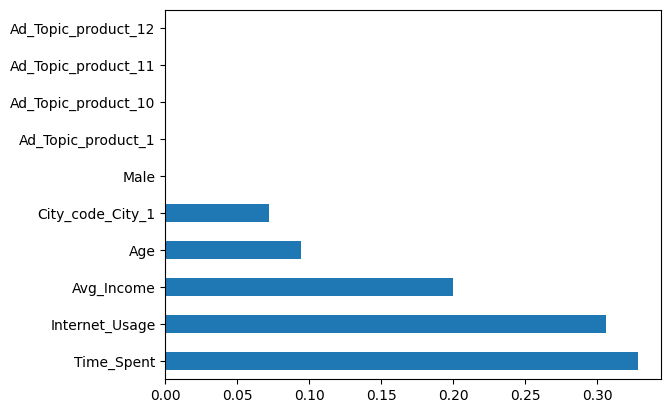

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf=AdaBoostClassifier(n_estimators=500, estimator=DTC, learning_rate=0.01)

print(clf)

# Creating model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testinf Sample Data:', round(F1_Score,2))

# Importing cross validation on a given algorithm
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

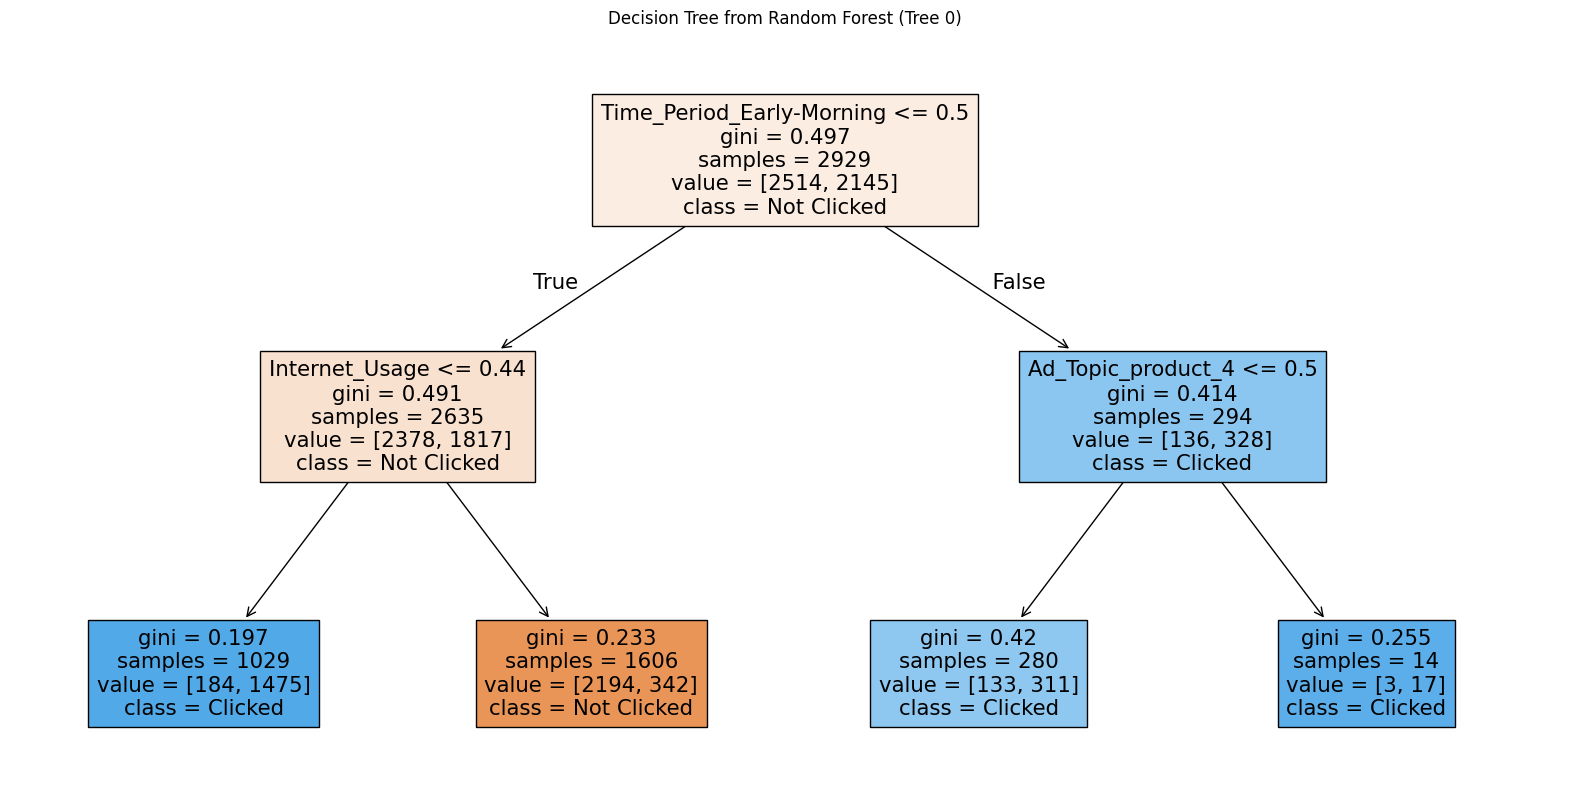

In [44]:
# Plotting a single decision Tree from the Random Forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the forest (e.g. the first one)
estimator=RF.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=Predictors, class_names=['Not Clicked', 'Clicked'], filled=True)
plt.title("Decision Tree from Random Forest (Tree 0)")
plt.show()

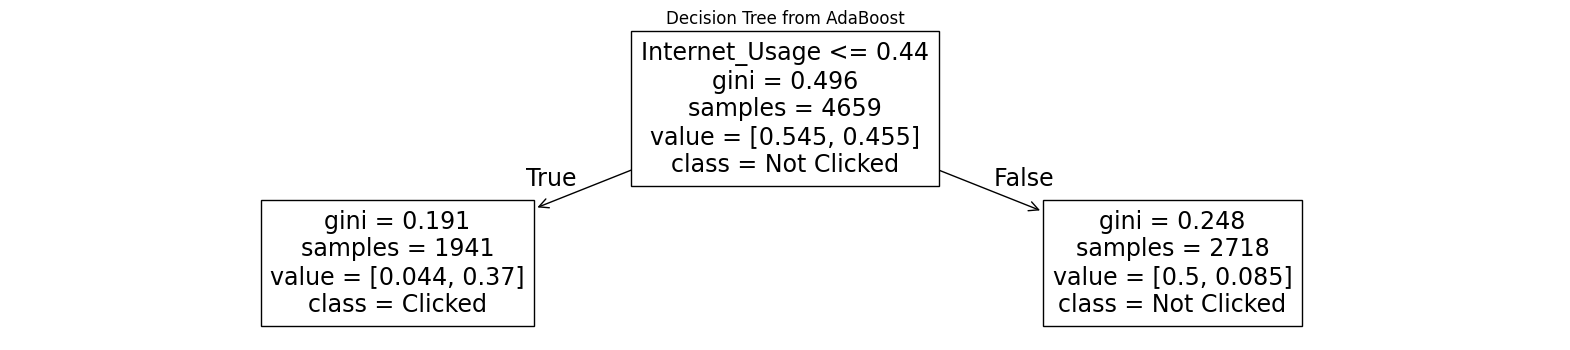

In [45]:
# Plotting one of the decision trees from Adaboost
from sklearn.tree import plot_tree

estimator=AB.estimators_[4]

plt.figure(figsize=(20,4))
plot_tree(estimator, feature_names=Predictors, class_names=['Not Clicked', 'Clicked'])
plt.title("Decision Tree from AdaBoost")
plt.show()

### KNN (K-Nearest Neighbor)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

print(clf)

# Creating model on Training Data
KNN=clf.fit(X_train, y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validaton function from sklearn
from sklearn.model_selection import cross_val_score

# 10-Fold Cross Validation
Accuracy_Values=cross_val_score(KNN, X, y, cv=10, scoring='f1_weighted')

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1080
           1       0.75      0.66      0.70       918

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998

[[874 206]
 [311 607]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.75843342 0.75583557 0.7433355  0.78247402 0.74582845 0.74049448
 0.75483191 0.76644885 0.73787474 0.75479348]

Final Average Accuracy of the model: 0.75


### SVM

In [48]:
from sklearn import svm
clf=svm.SVC(C=3, kernel='rbf', gamma=0.1)

print(clf)

# Creating model on Training data
SVM=clf.fit(X_train, y_train)
predict=SVM.predict(X_test)

# Measuring the accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the overall accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing Cross-validation
from sklearn.model_selection import cross_val_score

# 10 Fold cross-validation
Accuracy_Values=cross_val_score(SVM, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature important for Top 10 most important columns
%matplotlib inline

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1080
           1       0.75      0.66      0.70       918

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.74      1998
weighted avg       0.74      0.74      0.74      1998

[[874 206]
 [311 607]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.93839432 0.89506222 0.92160758 0.93512863 0.93353373 0.94259731
 0.94415224 0.94729481 0.94107037 0.93204514]

Final Average Accuracy of the model: 0.93


### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf=GaussianNB()
# clf=MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train, y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Cross-Validation
from sklearn.model_selection import cross_val_score

# 10-Fold cross validation
Accuracy_Values=cross_val_score(NB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', 'f1_weighted')
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.92      0.29      0.44      1080
           1       0.54      0.97      0.69       918

    accuracy                           0.60      1998
   macro avg       0.73      0.63      0.56      1998
weighted avg       0.75      0.60      0.55      1998

[[309 771]
 [ 26 892]]
Accuracy of the model on Testing Sample Data: 0.55

Accuracy values for 10-fold Cross Validation:
 f1_weighted

Final Average Accuracy of the model: 0.55


## Deployment of the Model

##### Step 1. Retaining the model using 100% data and only the best variables

In [53]:
# Seperating Target Variable and Predictor Variables
TargetVariable='Clicked'

# Best predictors based on multiple variable importance
Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [55]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using Adaboost algorithm with final hyperparameters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf=AdaBoostClassifier(n_estimators=500, estimator=DTC, learning_rate=0.01)

# Training the model
FinalAdaboostModel=clf.fit(X, y)

##### Step 2. Save the model as a serialized file which can be stored anywhere

In [56]:
import pickle
import os

# Saving the Python Objects as serialized files can be done using pickle library
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Closing the filestream
    fileWriteStream.close()

print('Pickle file of Predictive Model is saved at Location:', os.getcwd())

Pickle file of Predictive Model is saved at Location: c:\Users\Dell\Desktop\New folder\Case Study\Classification


##### Step 3. Create a python function

In [57]:
def PredictClickStatus(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)

    # Treating the binary nominal variable first
    InputData['Male'].replace({'Yes':1, 'No':0}, inplace=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Order of columns
    Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Loading the function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl','rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        fileReadStream.close()

    # Generating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictClickStatus=pd.DataFrame(Prediction, columns=['ClickPrediction'])
    return (PredictClickStatus)

In [61]:
DataForML[["Time_Spent", "Avg_Income", "Internet_Usage"]].head()

,Time_Spent,Avg_Income,Internet_Usage
0,87.97,55901.12,185.46
1,51.63,39132.00,176.73
2,82.37,57032.36,210.60
3,62.06,48868.00,190.05
4,77.66,61608.23,204.86
